In [1]:
import matplotlib.pyplot as plt
import numpy as np

0.9931740888037348


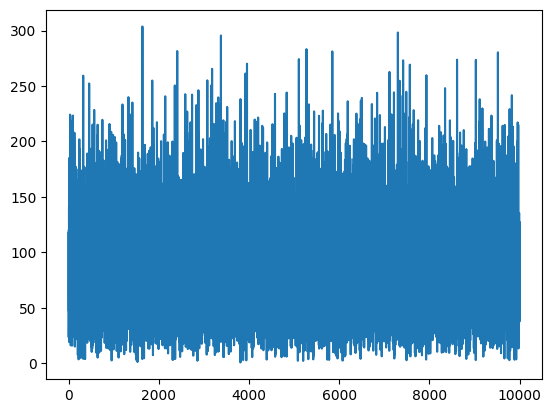

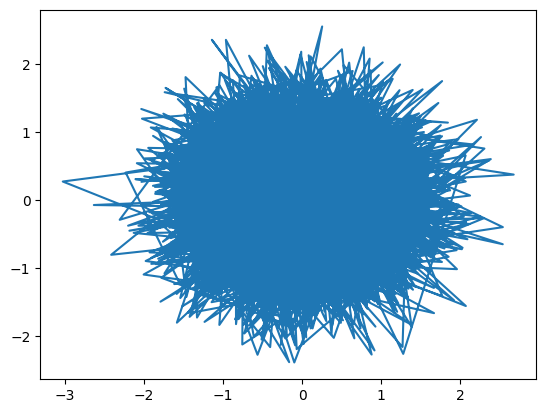

In [37]:
N=10000
sigma = 1
w = np.random.randn(N) + 1j*np.random.randn(N)
w *= sigma/np.sqrt(2)
W = np.fft.fft(w)

print(np.sum(np.abs(W)**2)/(N**2))

plt.plot(np.abs(W))
plt.show()

plt.plot(np.real(w), np.imag(w))

Radar ambiguity function

$$ \chi(\tau, f) = \int_{-\infty}^{\infty}x(t)x^*(t-\tau)e^{j2\pi ft}dt $$

In [139]:
def fftconv(a, b):
    return np.fft.ifft(np.fft(b) * np.fft.fft(b))

def caf(x, f_samples_1d, digital_bw):
    f_s = f_samples_1d*2 -1
    CAF = np.zeros((f_s, len(x)*2-1))*(0+1j)

    n = np.arange(len(x))
    
    for i in range(f_s):
        corr = np.convolve(x, np.flip(np.conj(x*np.exp(1j*2*np.pi*n*digital_bw*(-0.5 + i/f_s)))))
        CAF[i,:] = corr

    plt.imshow(np.abs(CAF))
    plt.show()

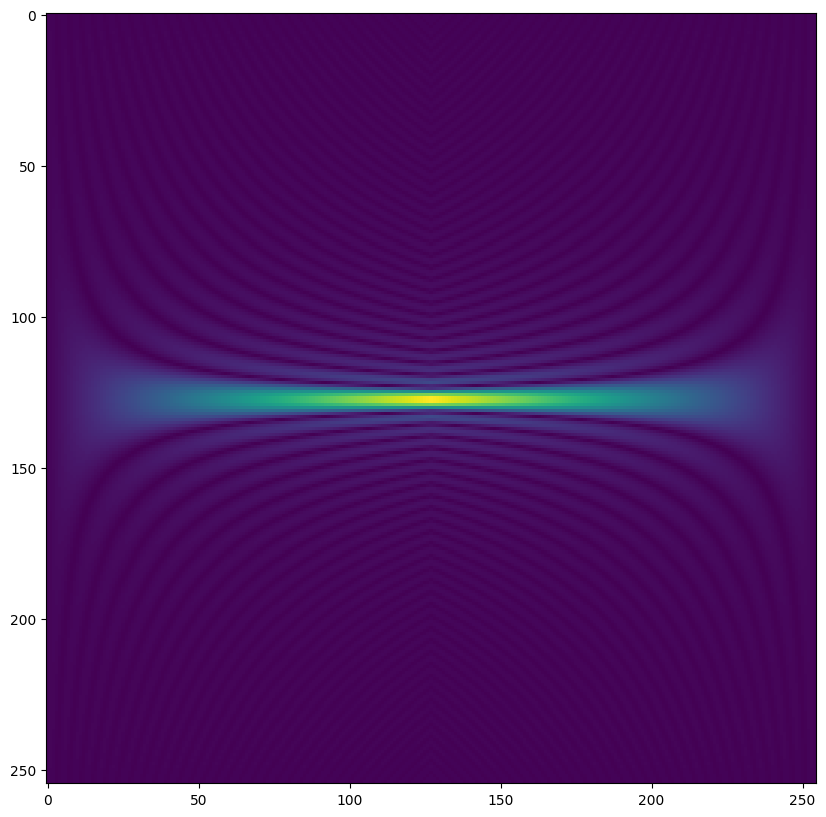

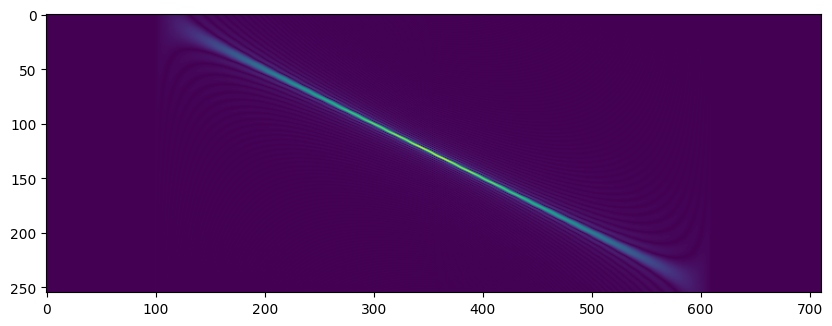

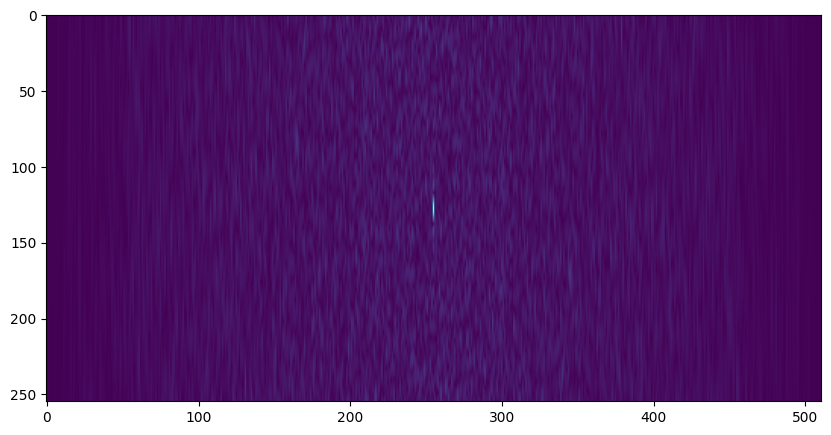

In [140]:
N = 256
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]

lfm = np.concat((np.exp(1j*2*np.pi*(0.125/N)*np.arange(N)**2), np.zeros(100)))

caf(np.ones(128), 128, 0.5)
caf(lfm, 128, 0.5)

w = np.random.randn(N) + 1j*np.random.randn(N)
w *= sigma/np.sqrt(2)
caf(w, 128,0.1)

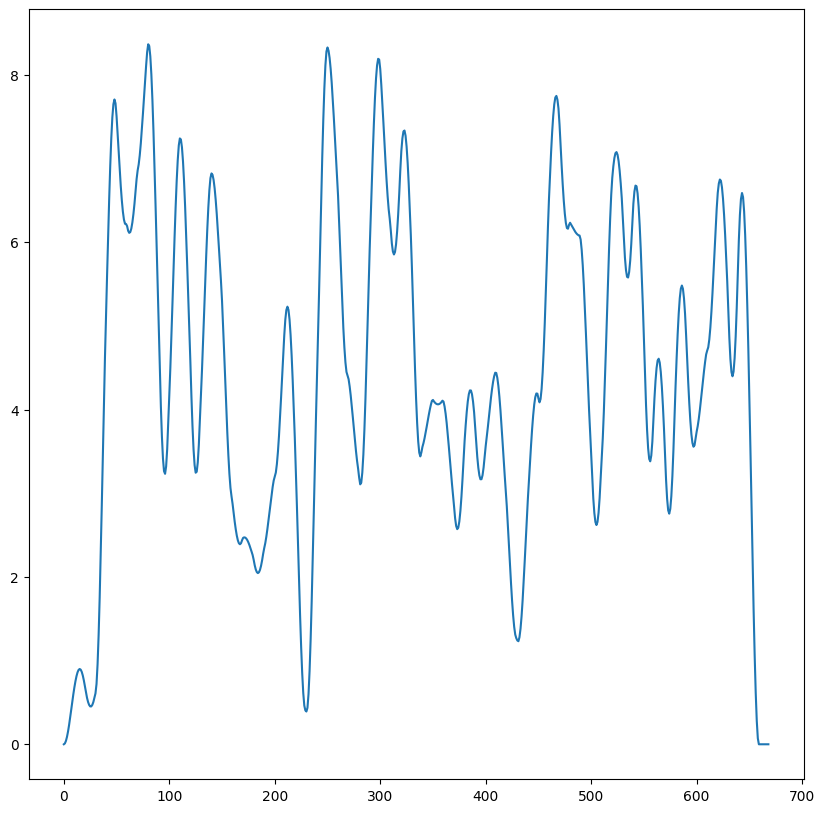

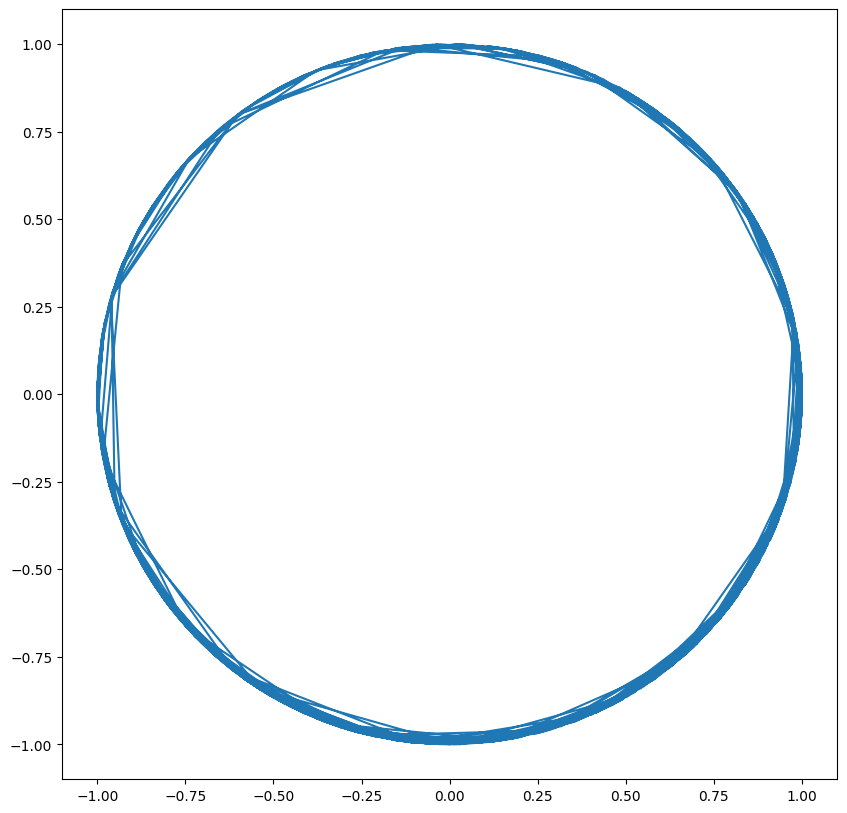

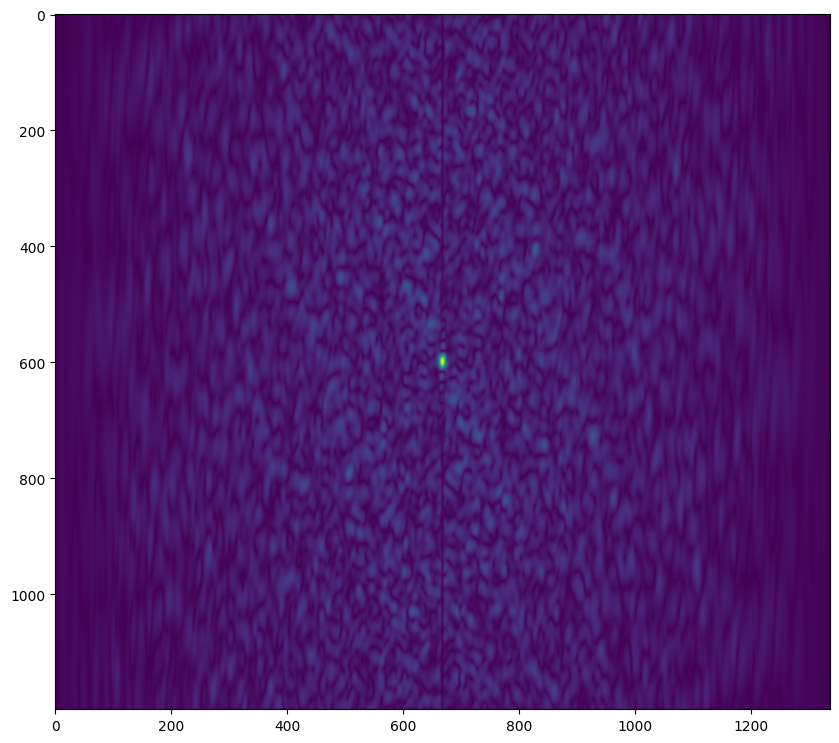

In [161]:
N=64
phi = np.random.uniform(low=0, high=2*np.pi,size=N)
samples_per_bit = 10
phi_ups = np.zeros(N*samples_per_bit)
phi_ups[::samples_per_bit]=phi
f = np.hanning(samples_per_bit*3)
phi_ups = np.convolve(phi_ups, f)
plt.plot(phi_ups)
plt.show()
qw = np.exp(1j*phi_ups)

plt.plot(np.real(qw), np.imag(qw))
plt.show()

caf(qw, 600, 0.1)